# Assignment 2 

### MACS 30000, Dr. Evans
### Haowen Shang

Due Wednesday, Oct. 17 at 11:30 AM

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

### 1. Imputing age and gender

#### (a) Here is where I will describe my proposed strategy ... and so on and so forth.

First, we can use data in "SurveyIncome.txt" and do inear regression to find linear relationship between age, gender, total income and weight. Then, we can use these linear models and data of income and weight from "BestIncome.txt" to impute age and gender variables (total income can be calculated by labor income plus capital income).
The linear models are as following:
$$\widehat{age_{i}}=\widehat{\alpha_{0}}+\widehat{\alpha_{1}}\cdot totl\underline{\hspace{0.5em}}inc_{i}+\widehat{\alpha _{2}}\cdot wgt_{i}$$
$$P(\widehat{female_{i}}=1\mid totl\underline{\hspace{0.5em}}inc_{i},wgt_{i})  = \frac{e^{\widehat{\beta _{0}}+\widehat{\beta _{1}}\cdot totl\underline{\hspace{0.5em}}inc_{i}+\widehat{\beta  _{2}}\cdot wgt_{i}}}{1+e^{\widehat{\beta _{0}}+\widehat{\beta _{1}}\cdot totl\underline{\hspace{0.5em}}inc_{i}+\widehat{\beta  _{2}}\cdot wgt_{i}}}$$




In [2]:
# I use the following code cells to read in my data of SurvIncome.txt, name my variables, run descriptive statistics, etc. 
survey_income_raw = "SurvIncome.txt"
survey = pd.read_table(survey_income_raw, sep=",", header=None)

survey_cols = [ 'total_inc', 'wgt', 'age', 'female']
survey.columns = survey_cols

In [3]:
survey.head()

,total_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [4]:
survey.tail()

,total_inc,wgt,age,female
995,61270.538697,184.930002,46.356881,0.0
996,59039.159876,180.482304,50.986966,0.0
997,67967.188804,156.816883,40.965268,0.0
998,79726.914251,158.935050,41.190371,0.0
999,71005.223603,169.067695,48.480007,0.0


In [5]:
survey.describe()

,total_inc,wgt,age,female
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,64871.210860,149.542181,44.839320,0.50000
std,9542.444214,22.028883,5.939185,0.50025
min,31816.281649,99.662468,25.741333,0.00000
25%,58349.862384,130.179235,41.025231,0.00000
50%,65281.271149,149.758434,44.955981,0.50000
75%,71749.038000,170.147337,48.817644,1.00000
max,92556.135462,196.503274,66.534646,1.00000


In [6]:
# I use the following code cells to read in my data of BestIncome.txt, name my variables, run descriptive statistics, etc. 
best_income_raw = "BestIncome.txt"
best = pd.read_table(best_income_raw, sep=",", header=None)

best_cols = [ 'lab_inc', 'cap_inc', 'hgt', 'wgt']
best.columns = best_cols

best['tot_inc'] = best.lab_inc +best.cap_inc

In [7]:
best.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612


In [8]:
best.tail()

,lab_inc,cap_inc,hgt,wgt,tot_inc
9995,51502.225233,14786.050723,66.781187,154.645212,66288.275956
9996,52624.117104,11048.811747,64.499036,165.868002,63672.928851
9997,50725.310645,13195.218100,64.508873,154.657639,63920.528745
9998,56392.824076,8470.592718,62.161556,145.498194,64863.416794
9999,44274.098164,12765.748454,64.974145,135.936862,57039.846618


In [9]:
best.describe()

,lab_inc,cap_inc,hgt,wgt,tot_inc
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57052.925133,9985.798563,65.014021,150.006011,67038.723697
std,8036.544363,2010.123691,1.999692,9.973001,8294.497996
min,22917.607900,1495.191896,58.176154,114.510700,33651.691815
25%,51624.339880,8611.756679,63.652971,143.341979,61452.517672
50%,56968.709935,9969.840117,65.003557,149.947641,67042.751487
75%,62408.232277,11339.905773,66.356915,156.724586,72636.874684
max,90059.898537,19882.320069,72.802277,185.408280,98996.053756


#### (b) Here is where I'll use my proposed method from part (a) to impute variables.

In [10]:
# I will use the following code cells to execute the code that will impute those variables.
outcome = 'age'
features =  ['total_inc', 'wgt']
X, y = survey[features], survey[outcome]
X = sm.add_constant(X, prepend=False)

m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.531
Time:                        18:46:15   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_inc    2.52e-05   2.26e-05      1.114      0.2

In [11]:
ols_survey = pd.concat([y, X], axis=1)
ols_survey.head()

,age,total_inc,wgt,const
0,46.610021,63642.513655,134.998269,1.0
1,48.791349,49177.380692,134.392957,1.0
2,48.429894,67833.339128,126.482992,1.0
3,41.543926,62962.266217,128.038121,1.0
4,41.201245,58716.952597,126.211980,1.0


In [12]:
ols_survey['agehat'] = res.predict(X)
ols_survey.head()

,age,total_inc,wgt,const,agehat
0,46.610021,63642.513655,134.998269,1.0,44.906121
1,48.791349,49177.380692,134.392957,1.0,44.545636
2,48.429894,67833.339128,126.482992,1.0,45.068980
3,41.543926,62962.266217,128.038121,1.0,44.935764
4,41.201245,58716.952597,126.211980,1.0,44.841048


In [13]:
outcome = 'female'
features =  ['total_inc', 'wgt']
X, y = survey[features], survey[outcome]
X = sm.add_constant(X, prepend=False)

m = sm.Logit(y, X)
res = m.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        18:46:17   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_inc     -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

In [14]:
logit_survey = pd.concat([y, X], axis=1)
logit_survey.head()

,female,total_inc,wgt,const
0,1.0,63642.513655,134.998269,1.0
1,1.0,49177.380692,134.392957,1.0
2,1.0,67833.339128,126.482992,1.0
3,1.0,62962.266217,128.038121,1.0
4,1.0,58716.952597,126.211980,1.0


In [15]:
logit_survey['prob_femalehat'] = res.predict(X)
logit_survey.head()

,female,total_inc,wgt,const,prob_femalehat
0,1.0,63642.513655,134.998269,1.0,0.998746
1,1.0,49177.380692,134.392957,1.0,0.999899
2,1.0,67833.339128,126.482992,1.0,0.999946
3,1.0,62962.266217,128.038121,1.0,0.999949
4,1.0,58716.952597,126.211980,1.0,0.999988


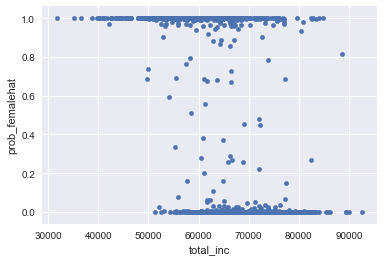

In [16]:
probability_of_being_female = logit_survey['prob_femalehat']
total_income = logit_survey['total_inc']
logit_survey.plot(x='total_inc', y='prob_femalehat', kind='scatter')
plt.show()

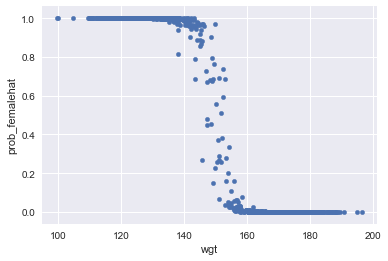

In [17]:
probability_of_being_female = logit_survey['prob_femalehat']
weight = logit_survey['wgt']
logit_survey.plot(x='wgt', y='prob_femalehat', kind='scatter')
plt.show()

In [18]:
def prob_female(gender):
    '''
    fuction to convert probability to dummy variable
    '''
    if gender > 0.5: 
        gender = 1
    else:
        gender = 0
    return gender

logit_survey['femalehat'] = logit_survey.prob_femalehat.apply(prob_female)
logit_survey.head()

,female,total_inc,wgt,const,prob_femalehat,femalehat
0,1.0,63642.513655,134.998269,1.0,0.998746,1
1,1.0,49177.380692,134.392957,1.0,0.999899,1
2,1.0,67833.339128,126.482992,1.0,0.999946,1
3,1.0,62962.266217,128.038121,1.0,0.999949,1
4,1.0,58716.952597,126.211980,1.0,0.999988,1


In [19]:
# I will use the following code cells to execute the code that will impute those variables using linear regression model and data in BestIncom.txt.

best['imputed_age_by_inc_wgt'] = 44.2097 + 2.52e-05*best.tot_inc \
                                     + (-0.0067)*best.wgt
e = math.exp(1)
best['imputed_probfemale_by_inc_wgt'] = e**(76.7929+(-0.0002)*best.tot_inc+\
 (-0.4460)*best.wgt)/(1+e**(76.7929+(-0.0002)*best.tot_inc+(-0.4460)*best.wgt))
best['imputed_female_by_inc_wgt'] = best.imputed_probfemale_by_inc_wgt.\
                                                    apply(prob_female)

best.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age_by_inc_wgt,imputed_probfemale_by_inc_wgt,imputed_female_by_inc_wgt
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,0.021951,0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,0.000031,0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,0.026951,0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,0.034805,0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,0.101359,0


In [20]:
best.tail()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age_by_inc_wgt,imputed_probfemale_by_inc_wgt,imputed_female_by_inc_wgt
9995,51502.225233,14786.050723,66.781187,154.645212,66288.275956,44.844042,0.004336,0
9996,52624.117104,11048.811747,64.499036,165.868002,63672.928851,44.702942,0.000049,0
9997,50725.310645,13195.218100,64.508873,154.657639,63920.528745,44.784291,0.006905,0
9998,56392.824076,8470.592718,62.161556,145.498194,64863.416794,44.869420,0.255027,0
9999,44274.098164,12765.748454,64.974145,135.936862,57039.846618,44.736327,0.991483,1


In [21]:
BestIncome = best[['lab_inc', 'cap_inc', 'hgt','wgt', 'imputed_age_by_inc_wgt', \
                   'imputed_female_by_inc_wgt']]
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,imputed_age_by_inc_wgt,imputed_female_by_inc_wgt
0,52655.605507,9279.509829,64.568138,152.920634,44.745897,0
1,70586.979225,9451.016902,65.727648,159.534414,45.157777,0
2,53738.008339,8078.132315,66.268796,152.502405,44.745701,0
3,55128.180903,12692.670403,62.910559,149.218189,44.919024,0
4,44482.794867,9812.975746,68.678295,152.726358,44.554687,0


#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [22]:
# I will use the following code cells to do so!
BestIncome['imputed_age_by_inc_wgt'].describe() 

count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
25%         44.747065
50%         44.890281
75%         45.042239
max         45.706849
Name: imputed_age_by_inc_wgt, dtype: float64

For imputed age ($age_{i}$) variable: 
The mean is  44.894036, the standard deviation is 0.219066, the minimum is 43.980016, the maximum is 45.706849 and number of observations is 10000.  

In [23]:
BestIncome['imputed_female_by_inc_wgt'].describe() 

count    10000.000000
mean         0.229400
std          0.420468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: imputed_female_by_inc_wgt, dtype: float64

For imputed gender ($female_{i}$) variable:
The mean is  0.229400, the standard deviation is 0.420468, the minimum is 0, the maximum is 1 and number of observations is 10000.  

#### (d) Correlation matrix for the now six variables

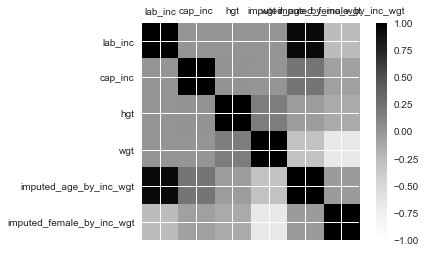

In [24]:
# Correlation matrix code and output
def corr_plot(BestIncome):
    names = BestIncome.columns
    N = len(names)
    
    correlations = BestIncome.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
corr_plot(BestIncome)

In [25]:
#In Matrix Form
corr = BestIncome.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,imputed_age_by_inc_wgt,imputed_female_by_inc_wgt
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924329,-0.245495
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234234,-0.0644033
hgt,0.00278978,0.0215716,1,0.172103,-0.0449272,-0.128783
wgt,0.00450691,0.00629868,0.172103,1,-0.299395,-0.672904
imputed_age_by_inc_wgt,0.924329,0.234234,-0.0449272,-0.299395,1,-0.0365975
imputed_female_by_inc_wgt,-0.245495,-0.0644033,-0.128783,-0.672904,-0.0365975,1


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [26]:
# Read in my third data set
income_intel_raw =  "IncomeIntel.txt"
income = pd.read_table(income_intel_raw, sep=",", header=None)

# Name my variables
income_cols = [ 'grad_year', 'gre_qnt', 'salary_p4']
income.columns = income_cols
income.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [27]:
# Run regression model
outcome = ['salary_p4']
features =  ['gre_qnt']
X, y = income[features], income[outcome]

X = sm.add_constant(X, prepend=False)

m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        18:46:30   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

#### #Report coefficients and SE's
Estimated coefficient $\beta_{0}$ is 8.954e+04, standard errors of $\beta_{0}$ is 878.764, estimated coefficient $\beta_{1}$ is (-25.7632) , standard errors of $\beta_{1}$ is 1.365.

#### (b) Create a scatterplot of GRE score and graduation year. 

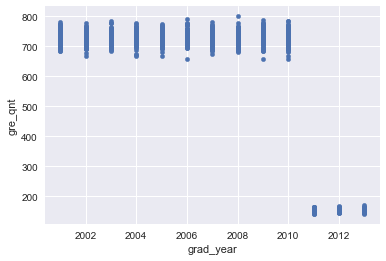

In [28]:
# Code and output of scatterplot
grad_year = income['grad_year']
gre_qnt = income['gre_qnt']
income.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

Here is where I'll discuss any problems that jump out. I'll propose a solution here as well.

Problems: Compared data before 2011 and data after 2011, we can see that the GRE quatitative score changed a lot. In other words, the data of GRE quantitative score are drifting because scoring scale changed in 2011. Because the data of GRE quatitative score are not stationary, it can cause problems when using the ordinary least squares regression model and thus the estimated coefficients are not reliable. 

Solution: We know that the GRE quantitative scoring scale is 800 before 2011 and is 170 after 2011, so we can change the data scale after 2011, which means changing the raw score in scale 170 to relative score in scale of 800 using equation (relative_score=raw_score*800/170). In this way, the the GRE quantitative scoring scale is same before 2011 and after 2011.

In [29]:
# Code to implement solution
income_aft2011 = income[income.grad_year >= 2011]
income_aft2011.head()

,grad_year,gre_qnt,salary_p4
770,2011.0,148.413532,90834.606478
771,2011.0,154.123690,87255.408421
772,2011.0,155.493697,76069.366122
773,2011.0,152.551097,92160.481069
774,2011.0,156.142446,78490.139535


In [30]:
income_aft2011['gre_qnt'].describe() 

count    230.000000
mean     154.894160
std        5.197198
min      141.261398
25%      151.293028
50%      154.626456
75%      158.185442
max      170.000000
Name: gre_qnt, dtype: float64

In [31]:
def gre_qnt_modified(gre_qnt):
    """
    function to convert GRE quantitative raw score to relative score.
    """
    gre_qnt_modified = (gre_qnt*800)/170
    return gre_qnt_modified

income_aft2011['gre_qnt_modified'] = income_aft2011.gre_qnt.apply(gre_qnt_modified)
income_aft2011.head()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified
770,2011.0,148.413532,90834.606478,698.416619
771,2011.0,154.123690,87255.408421,725.287951
772,2011.0,155.493697,76069.366122,731.735044
773,2011.0,152.551097,92160.481069,717.887515
774,2011.0,156.142446,78490.139535,734.787980


In [32]:
income_aft2011['gre_qnt_modified'].describe() 

count    230.000000
mean     728.913694
std       24.457401
min      664.759519
25%      711.967192
50%      727.653911
75%      744.402079
max      800.000000
Name: gre_qnt_modified, dtype: float64

In [33]:
income_bf2011 = income[income.grad_year < 2011]
income_bf2011.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [34]:
income_bf2011['gre_qnt'].describe() 

count    770.000000
mean     728.421378
std       23.377864
min      655.702537
25%      712.768894
50%      727.992935
75%      744.340352
max      799.715533
Name: gre_qnt, dtype: float64

In [35]:
income_bf2011['gre_qnt_modified'] = income_bf2011.gre_qnt
income_bf2011.head()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified
0,2001.0,739.737072,67400.475185,739.737072
1,2001.0,721.811673,67600.584142,721.811673
2,2001.0,736.277908,58704.880589,736.277908
3,2001.0,770.498485,64707.290345,770.498485
4,2001.0,735.002861,51737.324165,735.002861


In [36]:
frames = [income_bf2011, income_aft2011]
income_mod =  pd.concat(frames)

income_mod.head()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified
0,2001.0,739.737072,67400.475185,739.737072
1,2001.0,721.811673,67600.584142,721.811673
2,2001.0,736.277908,58704.880589,736.277908
3,2001.0,770.498485,64707.290345,770.498485
4,2001.0,735.002861,51737.324165,735.002861


In [37]:
income_mod.tail()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified
995,2013.0,160.441025,100430.166532,755.016586
996,2013.0,160.431891,82198.200872,754.973607
997,2013.0,154.254526,84340.214218,725.903653
998,2013.0,162.036321,87600.881985,762.523863
999,2013.0,156.946735,82854.576903,738.572869


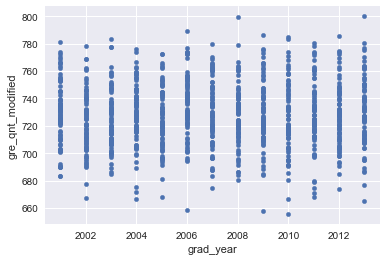

In [38]:
grad_year = income_mod['grad_year']
gre_qnt = income_mod['gre_qnt_modified']
income_mod.plot(x='grad_year', y='gre_qnt_modified', kind='scatter')
plt.show()

#### (c) Create a scatterplot of income and graduation year

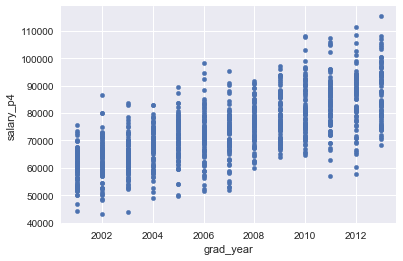

In [39]:
# Code and output of scatterplot
grad_year = income['grad_year']
salary = income['salary_p4']
income.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

Here is where I'll discuss any problems again ... and propose another solution.

Problems: The scatter plot above shows that the data of income 4 years after graduation are not stationary. There is a increasing trend that the mean of salary_p4 in each year increases along with the grad_year variable.

Solution:To address this problem, we need to do some linear modification of salary_p4 data. In particular, I will calculate the average salary for each graduation year, and use the following equation to standardize the salary for each year(use 2001 as the base year):
$$salary\underline{\hspace{0.5em}}modified=\frac{salary\underline{\hspace{0.5em}}p4}{(1+avg\underline{\hspace{0.5em}}growth\underline{\hspace{0.5em}}rate)^{grad\underline{\hspace{0.5em}}year-2001}}$$

In [40]:
#  Code to implement a solution
#Calculate the mean salary each year
avg_inc_by_year = income['salary_p4'].groupby(income['grad_year']).\
                         mean().values

#Calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / \
                   avg_inc_by_year[:-1]).mean()

In [41]:
#Divide each salary by (1 + avg_growth_rate) ** (grad_year - 2001)
income_mod['salary_modified'] =  income['salary_p4']/\
((1 + avg_growth_rate) ** (income['grad_year'] - 2001))
income_mod.head()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified,salary_modified
0,2001.0,739.737072,67400.475185,739.737072,67400.475185
1,2001.0,721.811673,67600.584142,721.811673,67600.584142
2,2001.0,736.277908,58704.880589,736.277908,58704.880589
3,2001.0,770.498485,64707.290345,770.498485,64707.290345
4,2001.0,735.002861,51737.324165,735.002861,51737.324165


In [42]:
income_mod.tail()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified,salary_modified
995,2013.0,160.441025,100430.166532,755.016586,69757.765226
996,2013.0,160.431891,82198.200872,754.973607,57094.028581
997,2013.0,154.254526,84340.214218,725.903653,58581.849117
998,2013.0,162.036321,87600.881985,762.523863,60846.675557
999,2013.0,156.946735,82854.576903,738.572869,57549.940651


In [43]:
income_mod.describe()

,grad_year,gre_qnt,salary_p4,gre_qnt_modified,salary_modified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.994000,596.510118,74173.293777,728.534611,61419.808910
std,3.740582,242.361960,12173.767372,23.619014,7135.610865
min,2001.000000,141.261398,43179.183141,655.702537,41164.726530
25%,2004.000000,684.983551,65778.240317,712.274822,56616.517414
50%,2007.000000,719.106878,73674.204810,727.910127,61467.616002
75%,2010.000000,739.332537,81838.874129,744.392487,66218.595876
max,2013.000000,799.715533,115367.665815,800.000000,84516.856633


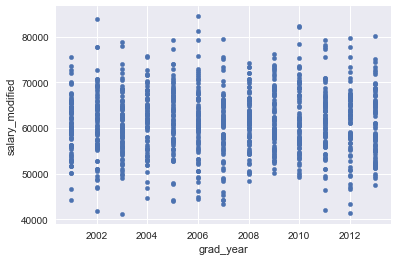

In [44]:
grad_year = income_mod['grad_year']
logsalary = income_mod['salary_modified']
income_mod.plot(x='grad_year', y='salary_modified', kind='scatter')
plt.show()

#### (d) Re-estimate coefficients with updated variables.

In [45]:
# Code to re-estimate, output of new coefficients
outcome = ['salary_modified']
features =  ['gre_qnt_modified']
X, y = income_mod[features], income_mod[outcome]
X = sm.add_constant(X, prepend=False)

m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        salary_modified   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6043
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.437
Time:                        18:46:45   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gre_qnt_modified    -7.4321      9.560  

Here is where I'll discuss how the coefficients differ, where I'll interpret why the changes  result in new coefficient changes, and where I'll discuss what this suggests about the answer to the question.

Estimated coefficient $\beta_{0}$ is 6.683e+04, standard errors of $\beta_{0}$ is 6968.684, estimated coefficient $\beta_{1}$ is (-7.4321) , standard errors of $\beta_{1}$ is 9.560.

The estimated coefficient $\beta_{0}$ is still near zero, and the standard error of $\beta_{0}$ increases by 8 times. The absolute value of coefficient $\beta_{1}$ is just 30% of the previous one because we changed the scale of part of gre_qnt data(increase the scale of data after 2011)  and we eliminated potential time trend in the salary_p4 data. The standard errors of $\beta_{1}$ increased by 7 times. Compared to previous OLS results, we find that $\beta_{1}$ is less negative and isn't statistically significant, which is much more reliable than previous significant result. 

The p-value is large and the coefficient $\beta_1$ is not statistically significant, so the OLS regression result gives no evidence that higher intelligence is associated with higher income.

### 3. Assessment of Kossinets and Watts.

Please see attached PDF.